In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
postulantes_educacion = pd.read_csv('Data/fiuba_1_postulantes_educacion.csv')

In [3]:
postulantes_genero_edad = pd.read_csv('Data/fiuba_2_postulantes_genero_y_edad.csv')

In [4]:
vistas = pd.read_csv('Data/fiuba_3_vistas.csv')

In [5]:
postulaciones = pd.read_csv('Data/fiuba_4_postulaciones.csv')

In [6]:
avisos_online = pd.read_csv('Data/fiuba_5_avisos_online.csv')

In [7]:
avisos_detalle = pd.read_csv('Data/fiuba_6_avisos_detalle.csv')

# Trabajando con el dataset de postulantes_educacion

In [8]:
postulantes_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298231 entries, 0 to 298230
Data columns (total 3 columns):
idpostulante    298231 non-null object
nombre          298231 non-null object
estado          298231 non-null object
dtypes: object(3)
memory usage: 6.8+ MB


In [9]:
postulantes_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [10]:
postulantes_educacion["nombre"].value_counts()

Secundario           110256
Universitario        104295
Terciario/Técnico     47733
Otro                  24748
Posgrado               7387
Master                 3598
Doctorado               214
Name: nombre, dtype: int64

In [11]:
postulantes_educacion["estado"].value_counts()

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

In [12]:
postulantes_educacion["idpostulante"].value_counts()

YlMLGD     9
54MQGz     8
EZD29      8
8keBRO     7
12eO0B     7
55R18N     7
kPNrbZV    7
1BodWQ     7
8KOd6x     7
aa1KkD     7
xk9VKeV    7
8M21pBL    7
Ee2ok0     7
Ez0LBk9    7
zv8vOxE    7
9692125    7
YNVjEr     7
EqkJA8     6
19wRVb     6
YjVzQKD    6
JBozewp    6
bOARLG0    6
owz49Zr    6
ekmL6x8    6
5G1krk     6
6rBDWwj    6
Nrev5x     6
4rWkN5P    6
2zLX4QY    6
63Rmv4     6
          ..
ak43oOD    1
1QP6KXB    1
KBdxkO0    1
JBrobrJ    1
lDLZGkj    1
JBrvYk5    1
GNZxYjw    1
5mqRLlw    1
MVex429    1
ek4PbVj    1
lDLJLw3    1
ow2VqDa    1
1QdJ0vj    1
bOVZJ10    1
bOj3veB    1
akj32RD    1
X9lqQbL    1
8M2mP0R    1
lDLl8Bj    1
NzrzBp4    1
ak4GAXN    1
8vYKpj     1
W9Oxkea    1
xkddoPz    1
W9A6D8a    1
mzjLzL1    1
Zz8xxY     1
5mPKLew    1
LNPo3vp    1
vV98xWe    1
Name: idpostulante, Length: 188752, dtype: int64

# Graficos que muestre las cantidades

Text(0,0.5,'Nivel de estudio')

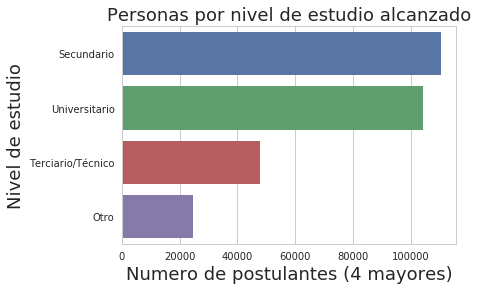

In [13]:
nombres_counts = postulantes_educacion["nombre"].value_counts()[:4]

grafico = sns.barplot(x=nombres_counts.values, y=nombres_counts.index, orient='h')
grafico.set_title("Personas por nivel de estudio alcanzado", fontsize=18)
grafico.set_xlabel("Numero de postulantes (4 mayores)",fontsize=18)
grafico.set_ylabel("Nivel de estudio", fontsize=18)

Text(0,0.5,'Nivel de estudio')

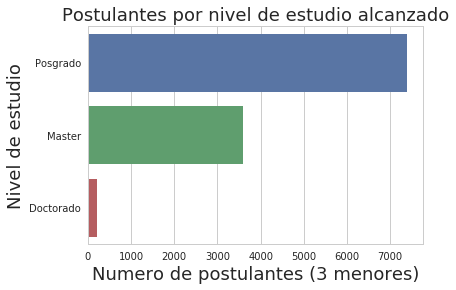

In [14]:
nombres_counts = postulantes_educacion["nombre"].value_counts()[4:]

grafico = sns.barplot(x=nombres_counts.values, y=nombres_counts.index, orient='h')
grafico.set_title("Postulantes por nivel de estudio alcanzado", fontsize=18)
grafico.set_xlabel("Numero de postulantes (3 menores)",fontsize=18)
grafico.set_ylabel("Nivel de estudio", fontsize=18)

Text(0,0.5,'Nivel de estudio y estado en el que está')

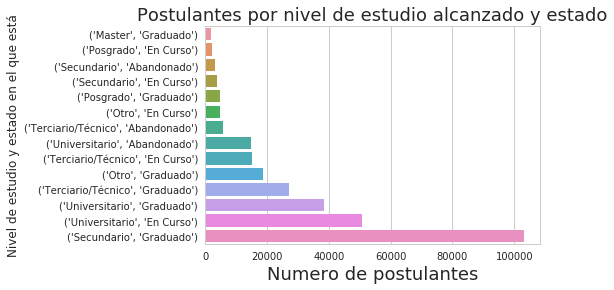

In [15]:
asd = postulantes_educacion.groupby(["nombre","estado"]).size().sort_values()[7:]

grafico = sns.barplot(x=asd.values, y=asd.index, orient='h')
grafico.set_title("Postulantes por nivel de estudio alcanzado y estado", fontsize=18)
grafico.set_xlabel("Numero de postulantes",fontsize=18)
grafico.set_ylabel("Nivel de estudio y estado en el que está", fontsize=12)

Text(0,0.5,'Nivel de estudio')

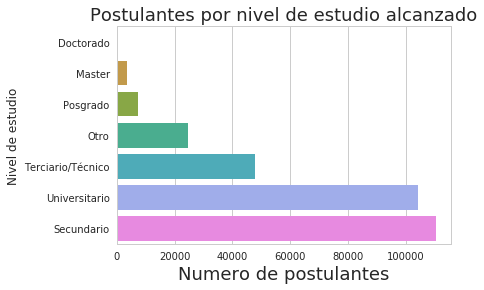

In [16]:
asd = postulantes_educacion.groupby(["nombre"]).size().sort_values()

grafico = sns.barplot(x=asd.values, y=asd.index, orient='h')
grafico.set_title("Postulantes por nivel de estudio alcanzado", fontsize=18)
grafico.set_xlabel("Numero de postulantes",fontsize=18)
grafico.set_ylabel("Nivel de estudio", fontsize=12)

Text(0,0.5,'Cantidad de postulantes')

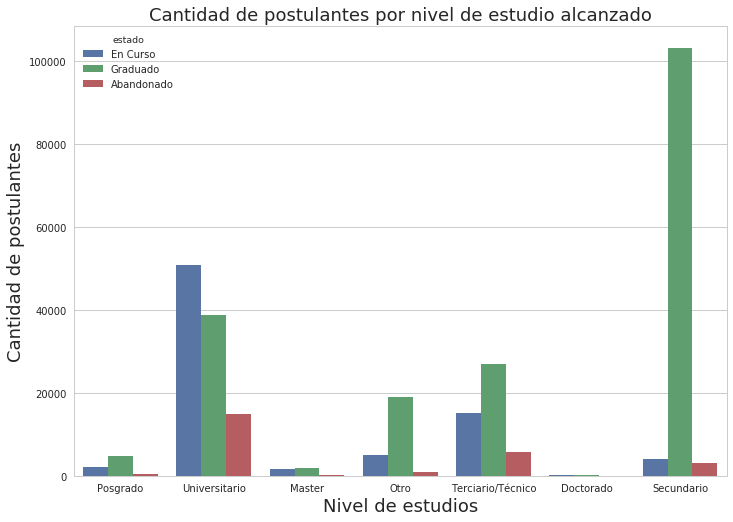

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="nombre", hue="estado", data=postulantes_educacion, ax=ax)
g.set_title("Cantidad de postulantes por nivel de estudio alcanzado", fontsize=18)
g.set_xlabel("Nivel de estudios", fontsize=18)
g.set_ylabel("Cantidad de postulantes", fontsize=18)


 # Trabajando con el dataset postulantes_genero_edad

In [18]:
postulantes_genero_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


### Voy a hacer un merge con el anterior dataset para sacar algunas relaciones

In [19]:
postulantes_merge = pd.merge(postulantes_educacion,postulantes_genero_edad,how = 'inner',on = 'idpostulante')
postulantes_merge

,idpostulante,nombre,estado,fechanacimiento,sexo
0,NdJl,Posgrado,En Curso,1969-05-09,MASC
1,NdJl,Universitario,Graduado,1969-05-09,MASC
2,8BkL,Universitario,En Curso,1976-07-21,FEM
3,8BkL,Universitario,Graduado,1976-07-21,FEM
4,8BkL,Posgrado,Graduado,1976-07-21,FEM
5,8BkL,Master,Graduado,1976-07-21,FEM
6,1d2B,Universitario,En Curso,1976-02-28,MASC
7,NPBx,Universitario,En Curso,1981-03-09,MASC
8,NPBx,Master,En Curso,1981-03-09,MASC
9,NPBx,Universitario,Graduado,1981-03-09,MASC


In [20]:
postulantes_merge['sexo'].value_counts()

FEM           156968
MASC          137828
NO_DECLARA      3435
Name: sexo, dtype: int64

In [21]:
postulantes_merge[postulantes_merge['sexo'] == "NO_DECLARA"]

,idpostulante,nombre,estado,fechanacimiento,sexo
2875,Z8warE,Universitario,Graduado,NaN,NO_DECLARA
6927,5boBRZ,Secundario,Graduado,NaN,NO_DECLARA
7165,Z4z8R8,Terciario/Técnico,Graduado,NaN,NO_DECLARA
7991,8LqOvL,Terciario/Técnico,En Curso,NaN,NO_DECLARA
7992,8LqOvL,Secundario,Graduado,NaN,NO_DECLARA
18800,epR0o2,Universitario,Graduado,NaN,NO_DECLARA
19615,epKMpW,Terciario/Técnico,Graduado,NaN,NO_DECLARA
19635,8kAxVR,Universitario,Graduado,1982-08-10,NO_DECLARA
21835,Ykw5JJ,Universitario,En Curso,NaN,NO_DECLARA
21836,Ykw5JJ,Universitario,Graduado,NaN,NO_DECLARA


In [22]:
#Voy a agregar una columna con la edad ya calculada(estimando por 2017-año nacimiento) para cada registro
postulantes_merge["año"] = postulantes_merge[postulantes_merge["fechanacimiento"].notnull()]\
        ["fechanacimiento"].apply(lambda x: x[0:4])
postulantes_merge["edad"] = postulantes_merge[postulantes_merge["año"].notnull()] \
        ["año"].apply(lambda x: 2017 - int(x))

In [23]:
postulantes_merge

,idpostulante,nombre,estado,fechanacimiento,sexo,año,edad
0,NdJl,Posgrado,En Curso,1969-05-09,MASC,1969,48.0
1,NdJl,Universitario,Graduado,1969-05-09,MASC,1969,48.0
2,8BkL,Universitario,En Curso,1976-07-21,FEM,1976,41.0
3,8BkL,Universitario,Graduado,1976-07-21,FEM,1976,41.0
4,8BkL,Posgrado,Graduado,1976-07-21,FEM,1976,41.0
5,8BkL,Master,Graduado,1976-07-21,FEM,1976,41.0
6,1d2B,Universitario,En Curso,1976-02-28,MASC,1976,41.0
7,NPBx,Universitario,En Curso,1981-03-09,MASC,1981,36.0
8,NPBx,Master,En Curso,1981-03-09,MASC,1981,36.0
9,NPBx,Universitario,Graduado,1981-03-09,MASC,1981,36.0


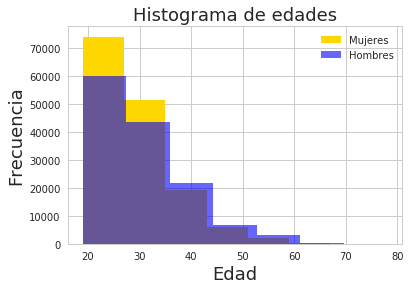

In [24]:
edades_sin_outsiders = postulantes_merge[(18 < postulantes_merge["edad"]) & (postulantes_merge["edad"] < 80)]
hombres = edades_sin_outsiders[edades_sin_outsiders["sexo"] == "MASC"]
mujeres = edades_sin_outsiders[edades_sin_outsiders["sexo"] == "FEM"]

g = mujeres["edad"].plot.hist(color='gold',bins=7)
g = hombres["edad"].plot.hist(color='blue',alpha=0.6,bins=7)
g.set_title("Histograma de edades", fontsize=18)
g.set_xlabel("Edad",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)
g.legend(["Mujeres","Hombres"])

# ¿Que genero tiene mejor nivel de estudios?

Text(0,0.5,'Nivel de estudio')

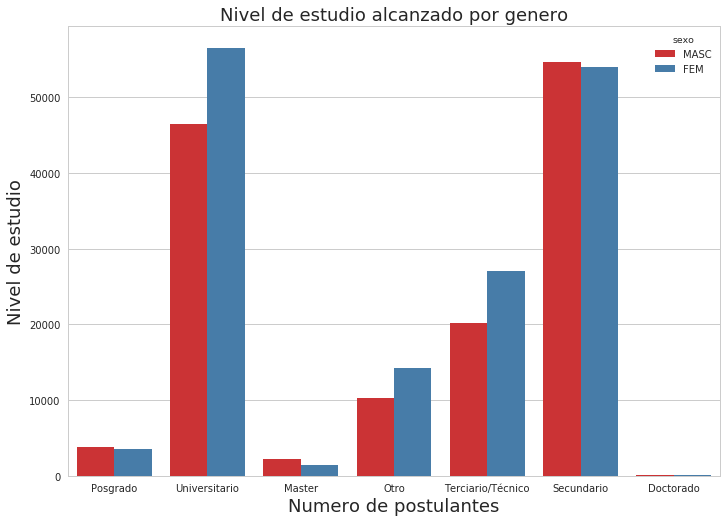

In [25]:
dato = postulantes_merge[postulantes_merge["sexo"] != "NO_DECLARA"]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)


grafico = sns.countplot(x="nombre", hue="sexo",data=dato, ax=ax,palette='Set1')
grafico.set_title("Nivel de estudio alcanzado por genero", fontsize=18)
grafico.set_xlabel("Numero de postulantes",fontsize=18)
grafico.set_ylabel("Nivel de estudio", fontsize=18)

#NO SE COMO MIERDA INVERTIR LOS COLORESSSSSSSS

Text(0,0.5,'Cantidad de postulantes')

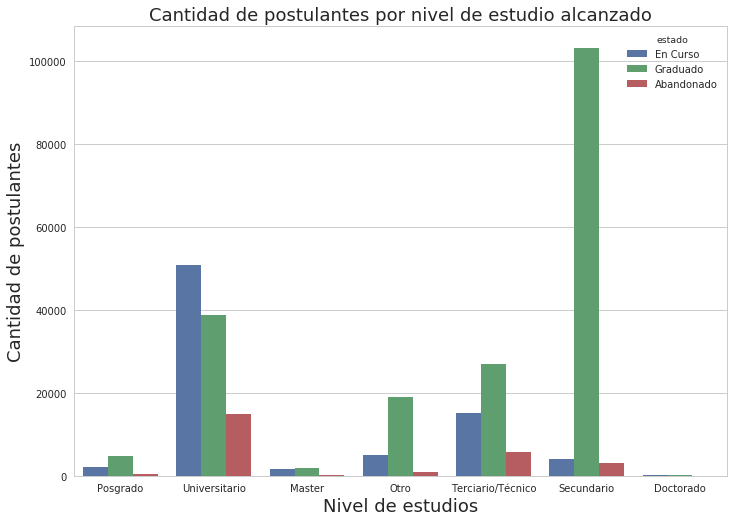

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="nombre", hue="estado", data=postulantes_merge, ax=ax)
g.set_title("Cantidad de postulantes por nivel de estudio alcanzado", fontsize=18)
g.set_xlabel("Nivel de estudios", fontsize=18)
g.set_ylabel("Cantidad de postulantes", fontsize=18)

#Es el mismo que hay un poco mas arriba.....

In [28]:
postulaciones

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03
5,1112277633,5awk,2018-01-29 13:34:44
6,1112302347,5awk,2018-02-07 20:49:22
7,1112291495,5awk,2018-02-07 20:50:13
8,1112304011,5awk,2018-02-07 20:51:15
9,1112326289,5awk,2018-02-09 20:24:57
